In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Datasets\titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
for i in df.columns:
  print(i,":",df[i].nunique())

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


In [6]:
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

Duplicate Rows: 0


In [7]:
# Let us find the null values
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
# Let us drop "PassengerId","Name","Cabin" which are not useful for model building
df=df.drop(columns=["PassengerId","Name","Ticket","Cabin"])

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


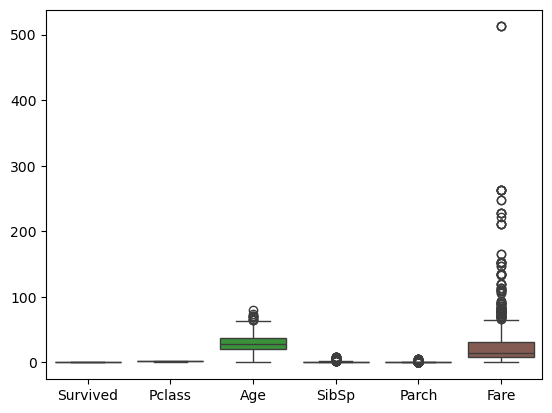

In [10]:
sns.boxplot(df)
plt.show()

In [11]:
# Let us fill the "Age","Fare" columns with median since it has outliers
# And Fill the categorical data with mode
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Fare"]=df["Fare"].fillna(df["Fare"].median())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [12]:
# Let us find the null values
df.isnull().sum()/len(df)*100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [13]:
num_cols = df.select_dtypes(include=['float64','int64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Survived: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


In [15]:
# Handling outliers (capping)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

In [19]:
y = df["Survived"]    # Target Column

In [20]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [16]:
X = df.drop(["Survived"], axis=1, errors='ignore')

In [17]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1.0,female,38.0,1.0,0.0,65.6344,C
2,3.0,female,26.0,0.0,0.0,7.9250,S
3,1.0,female,35.0,1.0,0.0,53.1000,S
4,3.0,male,35.0,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...
886,2.0,male,27.0,0.0,0.0,13.0000,S
887,1.0,female,19.0,0.0,0.0,30.0000,S
888,3.0,female,28.0,1.0,0.0,23.4500,S
889,1.0,male,26.0,0.0,0.0,30.0000,C


### Spliting the Data into Training and Testing set

In [21]:
import sklearn

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [28]:
num_cols      = ["Age", "SibSp", "Parch", "Fare"]
ordinal_cols  = ["Pclass"]
nominal_cols  = ["Sex", "Embarked"]

transformer = ColumnTransformer(
    transformers=[
        ("scale",   StandardScaler(), num_cols),
        ("ordinal", OrdinalEncoder(categories=[[1,2,3]]), ordinal_cols),
        ("onehot",  OneHotEncoder(drop="first"), nominal_cols)
    ],
    remainder="drop"
)

X_train_trans = transformer.fit_transform(X_train)
X_test_trans  = transformer.transform(X_test) # same data preprocessing for test data

In [30]:
X_train_trans=pd.DataFrame(X_train_trans,columns=transformer.get_feature_names_out())
X_test_trans=pd.DataFrame(X_test_trans,columns=transformer.get_feature_names_out())

In [31]:
X_train_trans.head()

,scale__Age,scale__SibSp,scale__Parch,scale__Fare,ordinal__Pclass,onehot__Sex_male,onehot__Embarked_Q,onehot__Embarked_S
0,1.362465,-0.604701,0.0,0.224500,0.0,1.0,0.0,1.0
1,-0.488196,-0.604701,0.0,-0.531688,1.0,1.0,0.0,1.0
2,0.252069,-0.604701,0.0,-0.779279,2.0,1.0,0.0,1.0
3,-0.241441,0.773050,0.0,-0.782733,2.0,1.0,0.0,1.0
4,-1.886473,2.839677,0.0,0.359882,2.0,0.0,0.0,1.0


In [32]:
X_test_trans.head()

,scale__Age,scale__SibSp,scale__Parch,scale__Fare,ordinal__Pclass,onehot__Sex_male,onehot__Embarked_Q,onehot__Embarked_S
0,-0.076938,0.773050,0.0,-0.422124,2.0,1.0,0.0,0.0
1,0.169817,-0.604701,0.0,-0.653654,1.0,1.0,0.0,1.0
2,-0.734950,-0.604701,0.0,-0.779279,2.0,1.0,0.0,1.0
3,-1.886473,-0.604701,0.0,0.444038,1.0,0.0,0.0,1.0
4,-1.228460,0.773050,0.0,-0.617469,2.0,0.0,0.0,0.0


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [34]:
# Logistic Regression
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_trans, y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred_log = log_clf.predict(X_test_trans)

In [36]:
accuracy_score(y_test, y_pred_log)

0.7932960893854749

In [39]:
# Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train_trans, y_train)
y_pred_tree = tree_clf.predict(X_test_trans)

In [40]:
accuracy_score(y_test, y_pred_tree)

0.8100558659217877

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# knn neighbours 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_trans, y_train)

KNeighborsClassifier()

In [45]:
y_pred_knn = knn.predict(X_test_trans)

In [46]:
accuracy_score(y_test,y_pred_knn)

0.8156424581005587

### Among the tested models, KNN achieved the highest accuracy (0.81), slightly outperforming Decision Tree (0.80) and Logistic Regression (0.79). The small difference indicates that the dataset’s predictive structure is simple and driven by a handful of strong features.